Display the interactive output of matplotlib inline. Run the following command and the resulting plots will be saved in this notebook. If you do not need it, just keep it here and move to the next cell.

In [1]:
%matplotlib notebook

# Compare all processes in single CPi model

This tutorial describes how to get the basic information of a single cpi model and simulate all of its processes using Juypter. You can follow the documents and run the code cell below to get the outputs you need.

## Load the single model of cpi

'CPi' is a .py file to get the information of a single cpi model. You can also simulate its processes with it. After it is imported, we can call the functions in this notebook.

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

## Select cpi file and process

The class 'ReadCPiFile(filename)' in 'CPi' is to fetch and store the information in single cpi file. Once you load this class, an existing cpi file from local and all of its process from the process list will be selected. Then a cpi model in Juypter is created.  User need to input the name of selected model to initiate this library.

In the following example, a model named 'cpi_model' will be created. If the number of processes in this model is one or more than five, it might be better to solve this model with the notebook 'basicCPi' or 'compareProcesses'.

In [3]:
cpi_model = CPi.ReadCPiFile('kai+jpto-eq')

Select the model: kai+jpto-eq
The processes in this cpi model are:
Kai, PTO, KaiPTO, KaiPTO2


## Simulate and compare processes

With this function you can solve the odes with selected solver and store the outputs of simulation. The outputs of first m odes will be plotted in the same figure to describe the concentration change of the species in the model. You can also choose to save the output figure or just display it in the notebook.

* simulate_all_processes(solver, t_start, t_final, t_divide)

The parameter 'solver' determines which ode solver will solve these processes, you can select from these two:

* odeint
* GLIMDA

The default ode solver is 'odeint' and it can solve most of the models. If this solver dose not satifiy your demands or cannot solve this model, you can use the 'GLIMDA' solver. In this case, it may take about 3 to 5 minutes to solve this complex model.

The next three input value should be positive float numbers, they are the time to start and end a process, and the number of points during this period. These parameters should be numerical.

#### The last paramter (number of points) is optional. However, if you leave it as zero, this function will use the 'GLIMDA' solver by default even you select 'odeint' at the very beginning.

In [4]:
solution = cpi_model.simulate_all_processes('GLIMDA', 0, 100, 0)

Time Start: 0.0, Time End: 100.0.
Input number of times: 0. You can only use GLIMDA solver to simulate this process.
Final Run Statistics: Simulate kai+jpto-eq process Kai 

 Number of steps                           : 1279
 Number of function evaluations            : 6908
 Number of Jacobian evaluations            : 2329
 Number of error test failures             : 5
 Number of LU decompositions               : 2329
 Number of nonlinear convergence failures  : 43

Solver options:

 Solver                  : GLIMDA (implicit)
 Tolerances (absolute)   : 1e-06
 Tolerances (relative)   : 1e-06

Simulation interval    : 0.0 - 100.0 seconds.
Elapsed simulation time: 279.66 seconds.
Time Start: 0.0, Time End: 100.0.
Input number of times: 0. You can only use GLIMDA solver to simulate this process.
Final Run Statistics: Simulate kai+jpto-eq process PTO 

 Number of steps                           : 1227
 Number of function evaluations            : 7146
 Number of Jacobian evaluations         

## Plot the simulation

* show_common_plot(select_one, plot_type)

* show_plot(plot_type)

* show_solution(process)

#### The method 'show_common_plot' can only be used in the case that there are common species in the comparing models.

The first input value 'select_one' stands for the common species that user tends to emphasize in figure. If common species are discovered in these processes, they will be printed after the simulation. If you prefer to compare some of these common species, you can enter their names in the text of 'select_species' for input comparing species. Each of the species' name should be separated by a space character. Their solutions will be plotted with the solid style, others will be dotted lines. If you prefer to emphasize all the common species, you can enter 'all' to plot all lines.  However, if you do not need to emphasize them, you can leave this text as empty string.

The second input variable 'plot_type' represent the type to plot the figure. Two plot types are supported in this function. All the solutions can be plotted together in a single figure or separately in several figures.

* single
* separate

The output figure can be saved by clicking on the disk-like button under the interactive figure. Users can interact with the labels in the figure here. Click on the different line labels and their line styles will be changed.

The default sequence of line styles are: '-', '--', '-.', ':' and unvisiable. Once the users click on the relevant labels, it will change according to this sequence. However, if you occasion to make a line unvisiable, click the same area on the label may turn it into the original style.

<IPython.core.display.Javascript object>


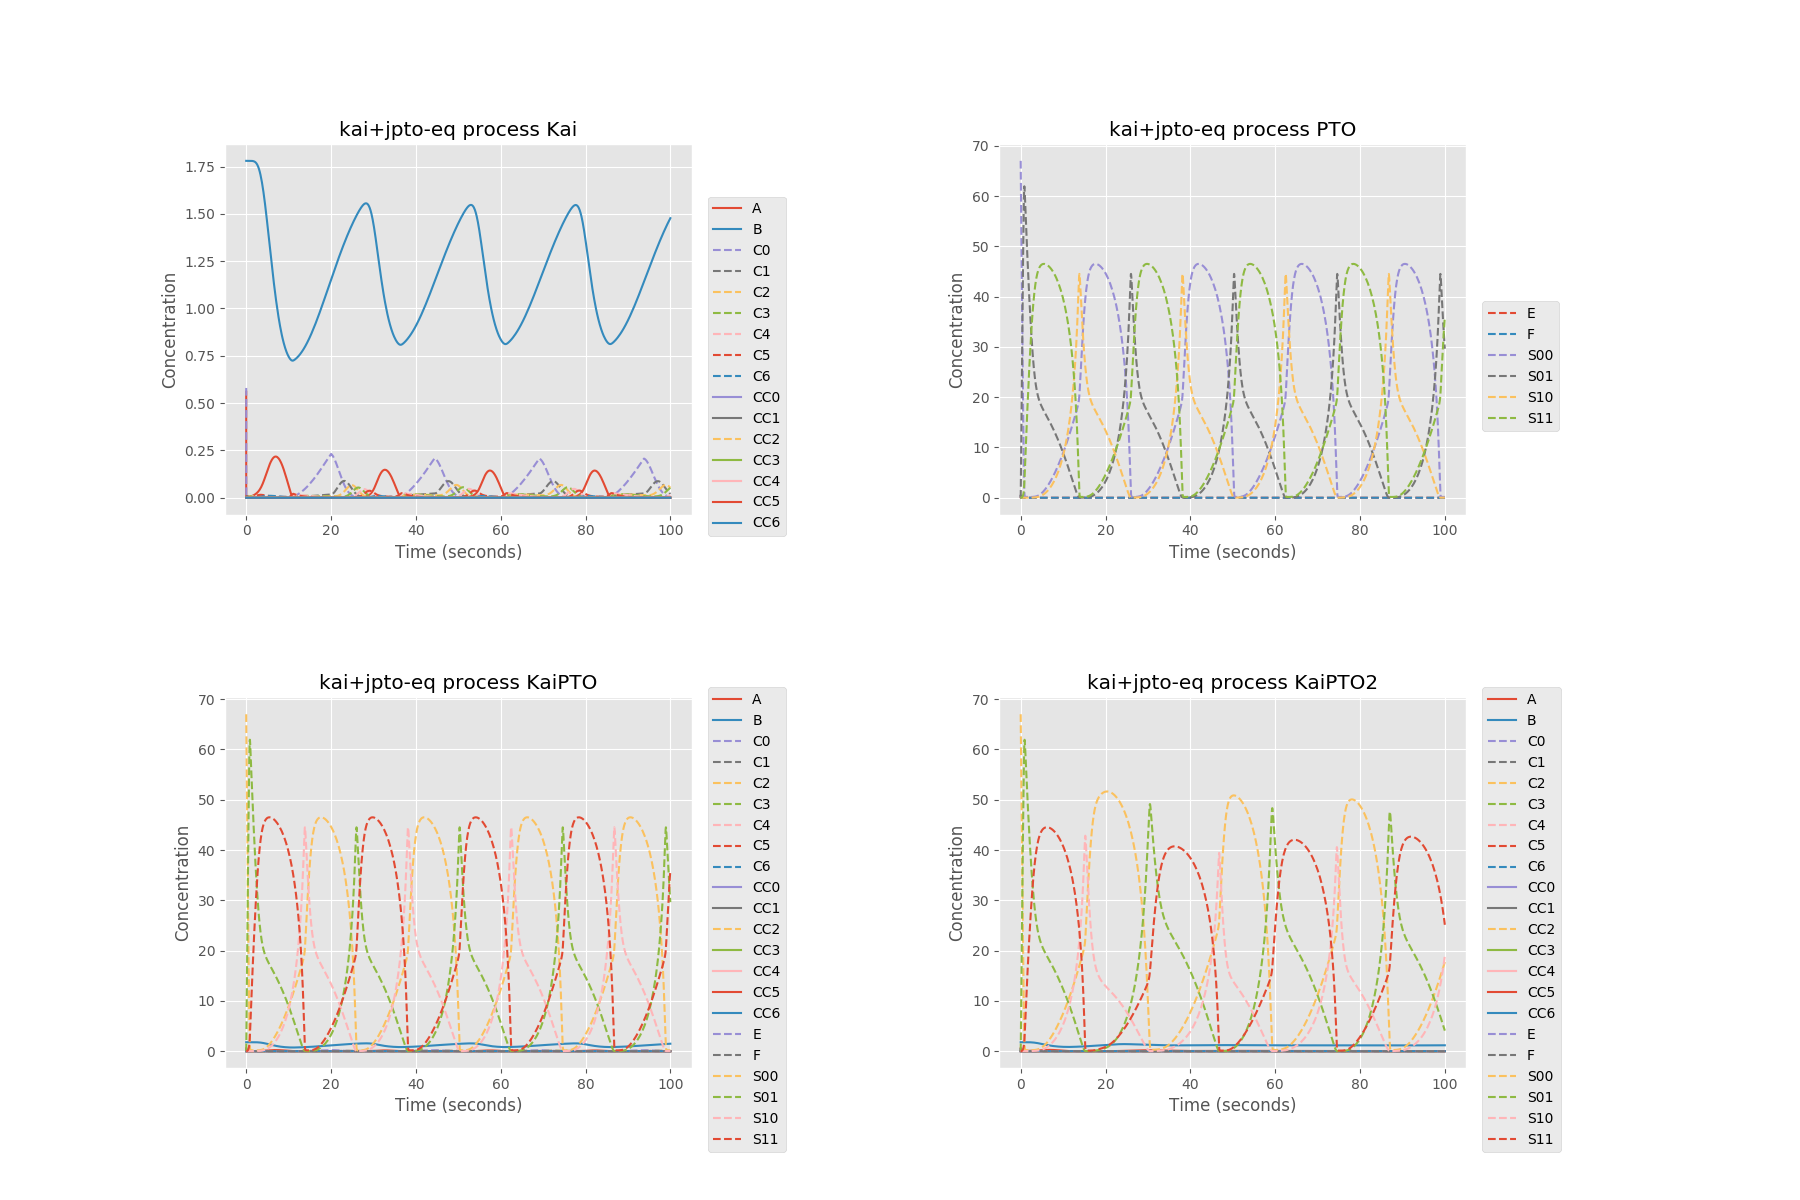

In [6]:
select_species = 'A B CC5 CC4 CC6 CC1 CC0 CC3'
solution.show_common_plot(select_species,'separate')

This method is used to plot all the species in models in solid lines.

* show_plot(plot_type)

<IPython.core.display.Javascript object>


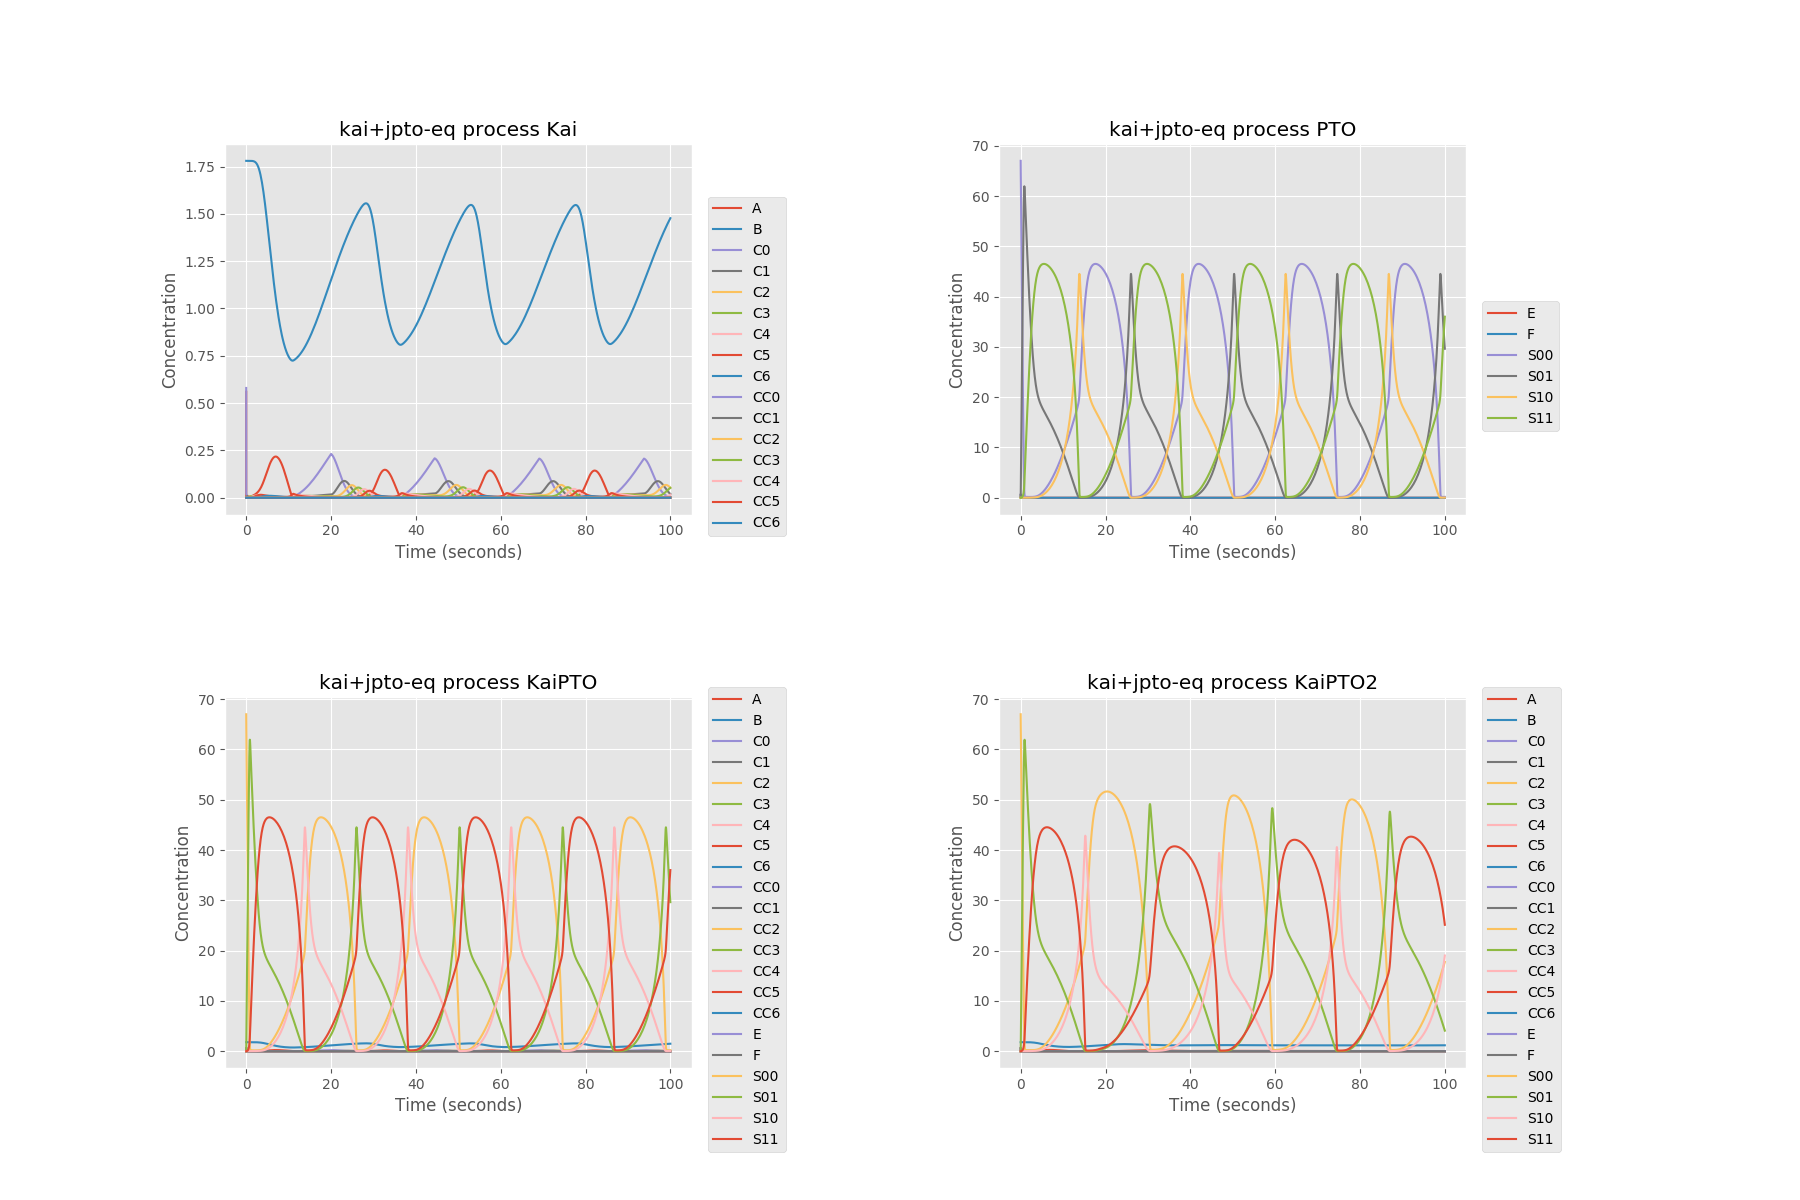

In [8]:
solution.show_plot('separate')

## View the numerical solution of simulation

With this function you can view the species' numerical results of selected process. 

* show_solution(process)

In [5]:
num_solution = solution.show_solution('PTO')
print num_solution

[[  5.80000000e-01   5.78204763e-01   5.77308548e-01 ...,   6.48405079e-05
    6.33828467e-05   6.27120652e-05]
 [  5.80000000e-01   5.80000000e-01   5.80000000e-01 ...,   1.37992388e-07
    1.43833269e-07   1.46107668e-07]
 [  6.70000000e+01   6.69982048e+01   6.69973085e+01 ...,   1.59041233e-01
    1.62022816e-01   1.63478784e-01]
 [  0.00000000e+00   2.86270076e-11   5.00855913e-11 ...,   3.14601361e+01
    3.01251178e+01   2.96342131e+01]
 [  0.00000000e+00   2.18538046e-38   4.33618592e-38 ...,   2.84773839e-02
    3.16217798e-02   3.29413377e-02]
 [  0.00000000e+00   5.09879744e-26   9.87493923e-26 ...,   3.41924102e+01
    3.55213011e+01   3.60094297e+01]]
